In [3]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# live 2
DETAILS OF FILES PROVIDED IN THIS RELEASE
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

INFORMATION FILES
The information fileS contains a list which describes how the database was created. 
Each line is separate entry in the image database: 
<Source image> <Destination image> <parameter>
where parameter depends on the distortion type as described above.

MATLAB mat files
The file dmos.mat has two arrays of length 982 each: dmos and orgs. orgs(i)==0 for distorted images.
The arrays dmos and orgs are arranged by concatenating the dmos (and orgs) variables
for each database as follows:

dmos=[dmos_jpeg2000(1:227) dmos_jpeg(1:233) white_noise(1:174) gaussian_blur(1:174) fast_fading(1:174)] where
dmos_distortion(i) is the dmos value for image "distortion\imgi.bmp" where distortion can be one of the five
described above.

The values of dmos when corresponding orgs==1 are zero (they are reference images). Note that imperceptible
loss of quality does not necessarily mean a dmos value of zero due to the nature of the score processing used.

The file refnames_all.mat contains a cell array refnames_all. Entry refnames_all{i} is the name of
the reference image for image i whose dmos value is given by dmos(i). If orgs(i)==0, then this is a valid
dmos entry. Else if orgs(i)==1 then image i denotes a copy of the reference image. The reference images are
provided in the folder refimgs.

Currently raw scores and standard deviations are not being released. They will be
released in the future.

In [8]:
# live 2
import scipy.io as sio
data_mat = sio.loadmat('databaserelease2/dmos.mat')
print('data_mat keys',data_mat.keys())
orgs = data_mat['orgs'].reshape(-1,).tolist()
dmos = data_mat['dmos'].reshape(-1,).tolist()
print('orgs length', len(orgs))
print('orgs 0-20', orgs[0:20])
print('dmos length', len(orgs))
print('dmos 0-20', dmos[0:20])
print('num of orgs', orgs.count(1))

data_mat keys dict_keys(['__header__', '__version__', '__globals__', 'orgs', 'dmos'])
orgs length 982
orgs 0-20 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1]
dmos length 982
dmos 0-20 [0.0, 28.00384535689855, 34.01073628022137, 65.13140970686972, 68.9113403034779, 65.15010253306134, 54.39726604294797, 44.39714490163311, 0.0, 47.430013761380415, 0.0, 41.412498424737386, 49.581143139311585, 48.84324745450706, 26.13791357747473, 0.0, 62.47870390031039, 37.598876406688994, 19.966622257732258, 0.0]
num of orgs 203


In [10]:
ref_names_mat = sio.loadmat('databaserelease2/refnames_all.mat')
print('ref_names_mat keys', ref_names_mat.keys())
ref_names = ref_names_mat['refnames_all'].reshape(-1).tolist()
ref_names = [x.tolist()[0] for x in ref_names] # convert to array to string list
print('ref_names_exp 0-20', ref_names[0:20])
print('ref_names shape', len(ref_names))

ref_names_mat keys dict_keys(['__header__', '__version__', '__globals__', 'refnames_all'])
ref_names_exp 0-20 ['buildings.bmp', 'studentsculpture.bmp', 'rapids.bmp', 'dancers.bmp', 'churchandcapitol.bmp', 'dancers.bmp', 'churchandcapitol.bmp', 'stream.bmp', 'cemetry.bmp', 'woman.bmp', 'lighthouse2.bmp', 'sailing3.bmp', 'buildings.bmp', 'paintedhouse.bmp', 'bikes.bmp', 'ocean.bmp', 'stream.bmp', 'carnivaldolls.bmp', 'sailing1.bmp', 'house.bmp']
ref_names shape 982


dmos=[dmos_jpeg2000(1:227) dmos_jpeg(1:233) white_noise(1:174) gaussian_blur(1:174) fast_fading(1:174)] 
where dmos_distortion(i) is the dmos value for image 
"distortion\imgi.bmp" where distortion can be one of the five described above.

In [11]:
dmos_jpeg2000 = dmos[0:227]
dmos_jpeg = dmos[227: 460]
dmos_wn = dmos[460:634]
dmos_gb = dmos[634:808]
dmos_ff = dmos[808:982]

In [12]:
file_jpeg2000 = ['databaserelease2/jp2k/img'+str(x)+'.bmp' for x in range(1,228)]
file_jpeg = ['databaserelease2/jpeg/img'+str(x)+'.bmp' for x in range(1,234)]
file_wn = ['databaserelease2/wn/img'+str(x)+'.bmp' for x in range(1,175)]
file_gb = ['databaserelease2/gblur/img'+str(x)+'.bmp' for x in range(1,175)]
file_ff = ['databaserelease2/fastfading/img'+str(x)+'.bmp' for x in range(1,175)]

In [13]:
img = cv2.imread(file_jpeg2000[0])

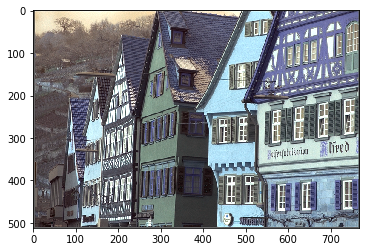

In [14]:
plt.imshow(img)

In [31]:
jp2k_df = pd.read_csv('databaserelease2/jp2k/info.txt',header=None, sep=' ')
jpeg_df = pd.read_csv('databaserelease2/jpeg/info.txt',header=None, sep=' ')
wn_df = pd.read_csv('databaserelease2/wn/info.txt',header=None, sep=' ')
gb_df = pd.read_csv('databaserelease2/gblur/info.txt',header=None, sep=' ')
ff_df = pd.read_csv('databaserelease2/fastfading/info.txt',header=None, sep=' ')

In [32]:
jp2k_df.head()

,0,1,2
0,buildings.bmp,img1.bmp,0.00000
1,studentsculpture.bmp,img2.bmp,1.64660
2,rapids.bmp,img3.bmp,0.72312
3,dancers.bmp,img4.bmp,0.25079
4,churchandcapitol.bmp,img5.bmp,0.12615


In [33]:
jp2k_src_list, jp2k_distortion_list, jp2k_param_list = jp2k_df[0].values.tolist(), jp2k_df[1].values.tolist(), jp2k_df[2].values.tolist()
jpeg_src_list, jpeg_distortion_list, jpeg_param_list = jpeg_df[0].values.tolist(), jpeg_df[1].values.tolist(), jpeg_df[2].values.tolist()
wn_src_list, wn_distortion_list, wn_param_list = wn_df[0].values.tolist(), wn_df[1].values.tolist(), wn_df[2].values.tolist()
gb_src_list, gb_distortion_list, gb_param_list = gb_df[0].values.tolist(), gb_df[1].values.tolist(), gb_df[2].values.tolist()
ff_src_list, ff_distortion_list, ff_param_list = ff_df[0].values.tolist(), ff_df[1].values.tolist(), ff_df[2].values.tolist()

In [35]:
print(jp2k_src_list[0:10])
print(jp2k_distortion_list[0:10])
print(jp2k_param_list[0:10])

['buildings.bmp', 'studentsculpture.bmp', 'rapids.bmp', 'dancers.bmp', 'churchandcapitol.bmp', 'dancers.bmp', 'churchandcapitol.bmp', 'stream.bmp', 'cemetry.bmp', 'woman.bmp']
['img1.bmp', 'img2.bmp', 'img3.bmp', 'img4.bmp', 'img5.bmp', 'img6.bmp', 'img7.bmp', 'img8.bmp', 'img9.bmp', 'img10.bmp']
[0.0, 1.6466, 0.72312, 0.25079, 0.12615, 0.21194000000000002, 0.38308000000000003, 0.71533, 0.0, 0.40026999999999996]
